# Data Processing with Pandas - Spotify Top 50 Tracks of 2020

Ever wondered what makes a song a global hit? This analysis dives into Spotify's Top 50 tracks of 2020 to uncover the hidden musical DNA that defines popular music, from energy levels to danceability, and how these attributes shape our listening experiences.

### Key Questions to Answer:

1. What are the dominant genres in 2020's top charts?
2. Are there specific audio features that consistently appear in popular tracks?
3. Can we identify distinct 'types' of hit songs based on their characteristics?

Dataset is taken from Kaggle with these columns:

- **artist** - Name of the artist.
- **album** - Name of the album that the song is on.
- **track_name** - Name of the song.
- **track_id** - ID of the song.
- **energy** (Ranges from 0 to 1) - Higher value means that the song is more energetic.
- **danceability** (Ranges from 0 to 1) - Higher value means that it is easier to dance to the song.
- **key** (11 categories) - An integer between 0 and 11 that represents the pitch class of the song’s musical key.
- **loudness** - Higher value means that the song is louder.
- **acousticness** (Ranges from 0 to 1) - This value describes how acoustic a song is.
- **speechiness** (Ranges from 0 to 1)
- **instrumentalness** (Ranges from 0 to 1)
- **liveness** (Ranges from 0 to 1)
- **valence** (Ranges from 0 to 1)
- **tempo** (Generally has a range of 20-200)
- **duration_ms** (Generally has a range of 200k-400k)
- **genre** (16 categories)


In [1]:
# Import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%load_ext blackcellmagic

## 1. Load & Display Data

First, we load the data and inspect its structure to ensure it's ready for analysis. We'll check the first few rows and column data types.

The CSV file has its own index column, so we instruct pandas to use the first column (index 0).

In [3]:
# Load CSV file and set the first column as the DataFrame index
df = pd.read_csv("spotify/spotifytoptracks.csv", index_col=0)
df.head()

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


Change the data types of the columns accordingly to their type.

In [4]:
df['key'] = df['key'].astype('category')
df['genre'] = df['genre'].astype('category')
df['artist'] = df['artist'].astype('string')
df['album'] = df['album'].astype('string')
df['track_name'] = df['track_name'].astype('string')

In [5]:
# Display basic info
print(f"\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   artist            50 non-null     string  
 1   album             50 non-null     string  
 2   track_name        50 non-null     string  
 3   track_id          50 non-null     object  
 4   energy            50 non-null     float64 
 5   danceability      50 non-null     float64 
 6   key               50 non-null     category
 7   loudness          50 non-null     float64 
 8   acousticness      50 non-null     float64 
 9   speechiness       50 non-null     float64 
 10  instrumentalness  50 non-null     float64 
 11  liveness          50 non-null     float64 
 12  valence           50 non-null     float64 
 13  tempo             50 non-null     float64 
 14  duration_ms       50 non-null     int64   
 15  genre             50 non-null     category
dtypes: category(2), 

#### Initial Data Overview:

- Dataset contains 50 rows and 16 columns
- There are no missing values
- Provides an overview of popular music attributes: energy, danceability, key, loudness, acousticness, speechiness, instrumentalness, liveness, valence, tempo, duration_ms.
- **Note:** duration_ms is in miliseconds. We will convert it to minutes and seconds later
- Provides genres: R&B/Soul, Alternative/Indie, Hip-Hop/Rap, Dance/Electronic, etc.
- The dataset is relatively small, consuming only 6.6+ KB of memory, making it efficient to work with.

## 2. Data Cleaning

Standardize text formatting, remove redundant columns, and address missing and duplicate values.

### 2.1. String Formatting

In [6]:
# Capitalize the first letter of each word in selected columns
text_cols = ["artist", "album", "track_name"]
for col in text_cols:
    df[col] = df[col].str.title()

### 2.2. Removing Columns

Removing track_id that is a unique identifier not needed for aggregate trend analysis.

In [7]:
# Eliminating "track_id" since it's irrelevant for analysis
df.drop("track_id", axis=1, inplace=True)

In [8]:
df.head()

,artist,album,track_name,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,Saint Jhn,Roses (Imanbek Remix),Roses - Imanbek Remix,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don'T Start Now,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


### 2.3. Handling missing values

As previously noted, this dataset contains no missing values. This section is included for future re-use, when dataset with missing values require processing.

Display existing missing value rows before deletion.

In [9]:
def show_missing_rows(df):
    """
    Check and display rows with missing values in the DataFrame
    """
    missing_rows = df[df.isnull().any(axis=1)]
    if not missing_rows.empty:
        print("Rows with missing values found:")
        display(missing_rows)
    else:
        print("No missing values found.")

In [10]:
show_missing_rows(df)

No missing values found.


In [11]:
# Remove any rows from the DataFrame that contain missing values
# df.dropna(inplace=True)

### 2.4. Display and remove duplicate samples and features

Display existing duplicate values before deletion.

In [12]:
def handle_duplicate_df(df):
    """
    Detects and removes duplicate rows and columns from the DataFrame.
    """
    duplicate_rows = df[df.duplicated(keep=False)]
    duplicate_cols = df.columns[df.T.duplicated()]

    if not duplicate_rows.empty:
        print("Duplicate samples found:")
        display(duplicate_rows)
    else:
        print("No duplicate samples found.")

    if len(duplicate_cols) > 0:
        print("Duplicate features found:", list(duplicate_cols))
    else:
        print("No duplicate features found.")

    df = df.drop_duplicates().loc[:, ~df.T.duplicated()]
    return df

In [13]:
df = handle_duplicate_df(df)

No duplicate samples found.
No duplicate features found.


### 2.5. Checking outliers

In [14]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

#### 2.5.2. Count upper and lower bound outliers

In [15]:
def count_all_outliers(df):
    outlier_dict = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        lower_outliers = (df[col] < lower_bound).sum()
        upper_outliers = (df[col] > upper_bound).sum()

        outlier_dict[col] = {
            "Upper Outliers": upper_outliers,
            "Lower Outliers": lower_outliers  
        }

    outlier_df = pd.DataFrame.from_dict(outlier_dict, orient="index").T
    return outlier_df

In [16]:
outlier_summary_df = count_all_outliers(df_numeric)
outlier_summary_df

,energy,danceability,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
Upper Outliers,0,0,0,7,6,12,3,0,0,2
Lower Outliers,0,3,1,0,0,0,0,0,0,0


#### 2.5.2. Plot the outliers

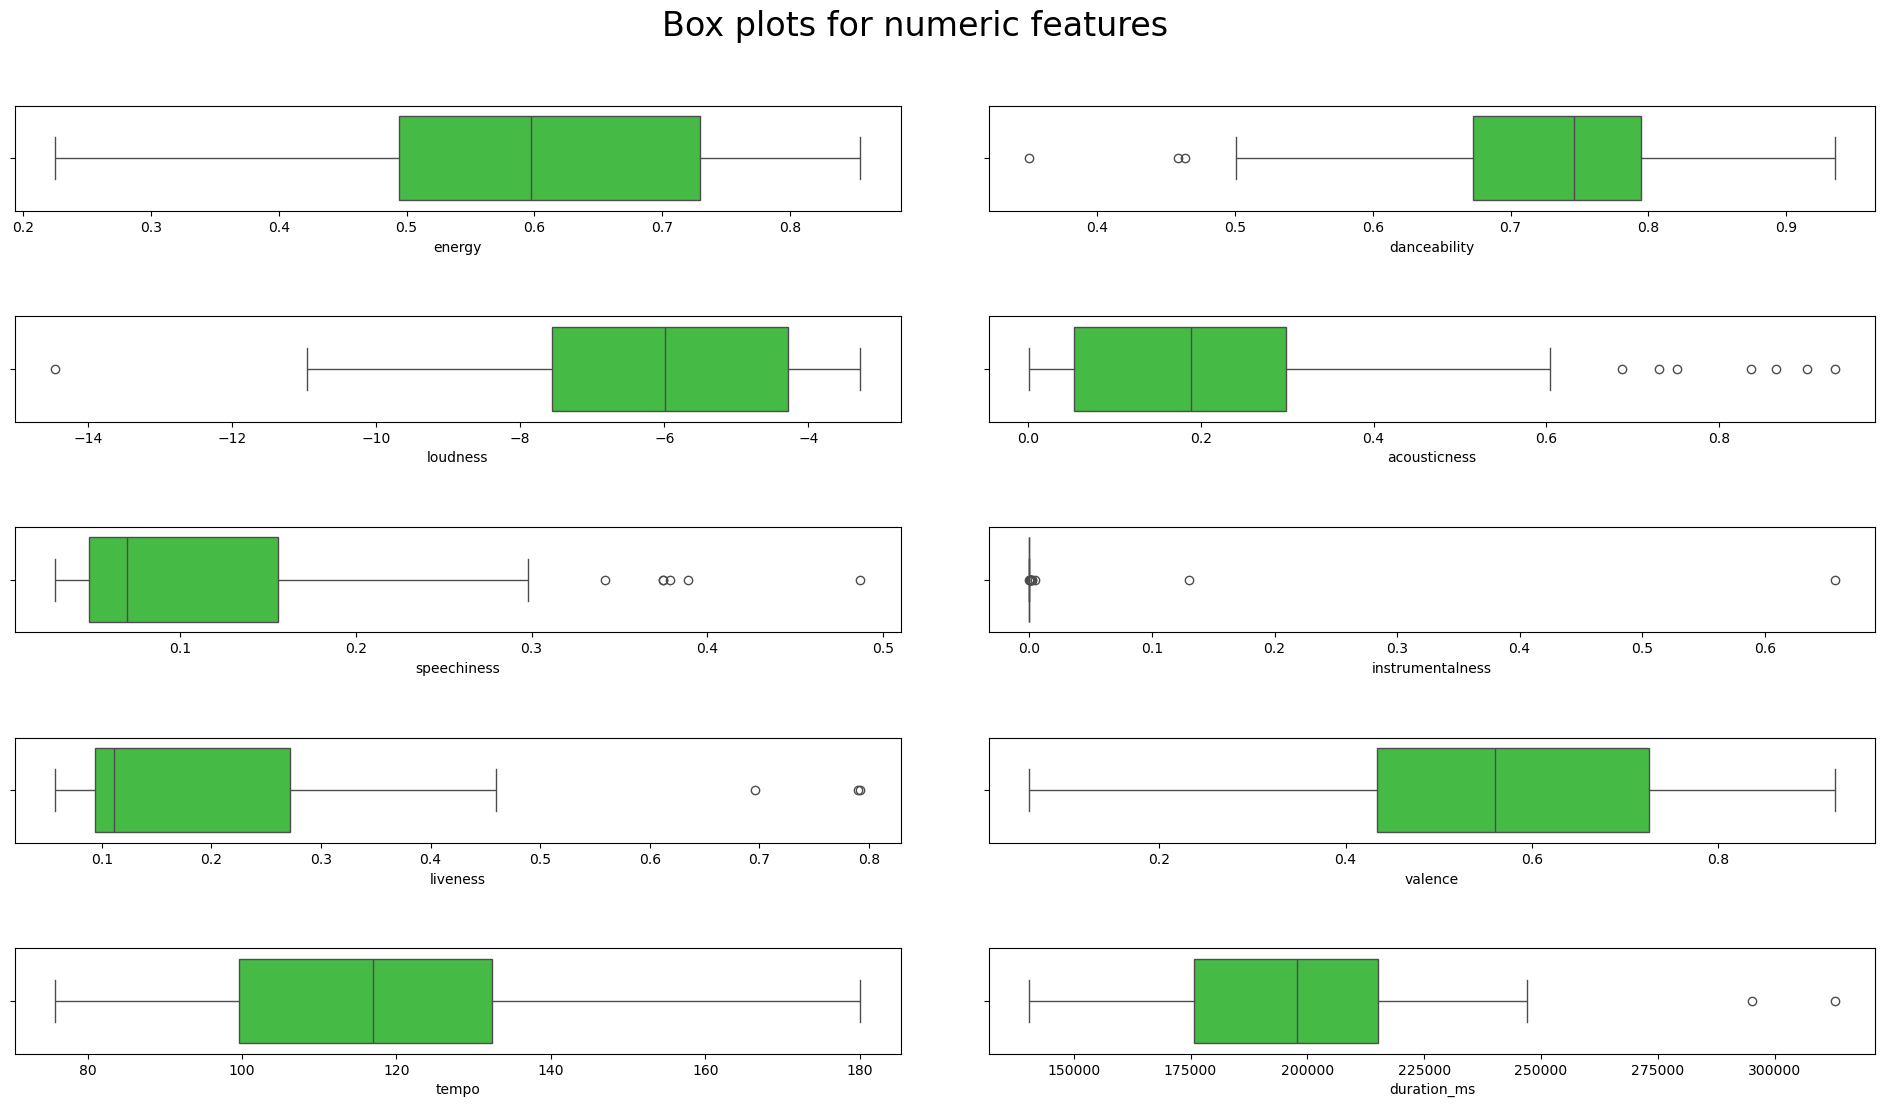

In [17]:
num_rows = 5
num_cols = 2

fig, ax = plt.subplots(figsize=(24, 12), nrows=num_rows, ncols=num_cols)

fig.suptitle("Box plots for numeric features", fontsize=24)

for i, col in enumerate(df_numeric.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(data=df_numeric, x=col, color="limegreen")

plt.subplots_adjust(top=0.9, wspace=0.1, hspace=1)

#### Insights 
- **Outlier Presence:** Features like acousticness and speechiness show a high concentration of outliers on the upper end, suggesting some tracks have unusually high values for these characteristics.
- Energy, valence and tempo appear to be more uniformly distributed, suggesting lower variability and fewer anomalies.
- It's also notable that Instrumentalness has a median near zero, indicating that **most tracks are not highly instrumental**.

**We'll keep these outliers for this analysis, as top music tracks often have extreme values.**

## 3. Exploratory Data Analysis

### 3.1. Summary of Dataset

In [18]:
def summarize_dataframe(df):
    """
    Generate and display a summary of the dataset including
    number of observations, number of features, and lists
    of categorical and numeric columns.
    """
    categorical = df.select_dtypes(include="object").columns.tolist()
    numerical = df.select_dtypes(include="number").columns.tolist()

    summary = pd.DataFrame(
        {
            "Description": [
                "Number of observations",
                "Number of features",
                f"Categorical features ({len(categorical)})",
                f"Numeric features ({len(numerical)})",
            ],
            "Value": [
                df.shape[0],
                df.shape[1],
                ", ".join(categorical),
                ", ".join(numerical),
            ],
        }
    )

    pd.set_option("display.max_colwidth", None)
    display(summary)

In [19]:
summarize_dataframe(df)

,Description,Value
0,Number of observations,50
1,Number of features,15
2,Categorical features (0),
3,Numeric features (10),"energy, danceability, loudness, acousticness, speechiness, instrumentalness, liveness, valence, tempo, duration_ms"


### 3.2. TOP Artists Overview

In [20]:
# Count how many times each artist appears
artist_counts = df["artist"].value_counts()

In [21]:
def summarize_artists_table(artist_counts, min_tracks=2):
    """
    Return a DataFrame of artists with > 1 tracks.
    Adds a 'status' column to indicate top artist(s).
    """
    max_tracks = artist_counts.max()

    # Filter artists with ≥ min_tracks
    popular_artists = artist_counts[artist_counts >= min_tracks]
    df_popular = popular_artists.reset_index()
    df_popular.columns = ["artist", "num_top_tracks"]

    # Tag top artist(s)
    df_popular["status"] = df_popular["num_top_tracks"].apply(
        lambda x: "Top Artist" if x == max_tracks else "Multiple Tracks"
    )

    print(
        f"Total Artists: {len(df_popular) + (artist_counts == 1).sum()}\n"
        f"Top artist(s) with {max_tracks} track(s): "
        f"{', '.join(df_popular[df_popular["num_top_tracks"] == max_tracks]["artist"])}"
    )
    print(
        f"Artists with ≥ {min_tracks} top track(s): {len(df_popular)}\n"
        f"Artists with 1 top track: {(artist_counts == 1).sum()}\n"
    )

    return df_popular.sort_values(by="num_top_tracks", ascending=False)

In [22]:
df_summary = summarize_artists_table(artist_counts)
display(df_summary)

Total Artists: 40
Top artist(s) with 3 track(s): Billie Eilish, Travis Scott, Dua Lipa
Artists with ≥ 2 top track(s): 7
Artists with 1 top track: 33



,artist,num_top_tracks,status
0,Billie Eilish,3,Top Artist
1,Travis Scott,3,Top Artist
2,Dua Lipa,3,Top Artist
3,Justin Bieber,2,Multiple Tracks
4,Harry Styles,2,Multiple Tracks
5,Lewis Capaldi,2,Multiple Tracks
6,Post Malone,2,Multiple Tracks


#### Insights 
- There are 40 artists in the Top 50 list.
- The most popular artists: **Billie Eilish, Dua Lipa, Travis Scott** each having 3 of their tracks in the list.
- Justin Bieber, Harry Styles, Lewis Capaldi, Post Malone has 2 of their tracks on the list.

### 3.3. Number of Artists by Track Visualization

In [23]:
# How many artists fall into each count bucket
artist_freq = artist_counts.value_counts().sort_index()

# Create a DataFrame for plotting
df_artist_freq = artist_freq.reset_index(name="num_artists")
df_artist_freq.columns = ["track_count", "num_artists"]

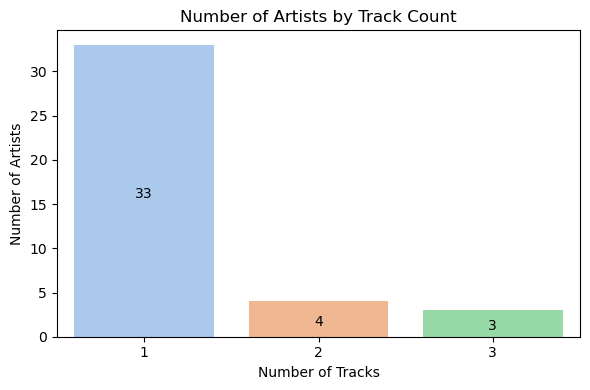

In [24]:
# Plotting
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    x="track_count",
    y="num_artists",
    data=df_artist_freq,
    palette="pastel",
    hue="track_count",
    legend=False,
)

for container in ax.containers:
    ax.bar_label(container, fmt="%d", label_type="center", padding=-2)

plt.title("Number of Artists by Track Count")
plt.xlabel("Number of Tracks")
plt.ylabel("Number of Artists")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Insights 
- **82.5%** (33 out of 40) of artists in Top 50 **have only one track**.
- 7 artists have multiple tracks, with 4 artists contributing two tracks and 3 artists contributing three tracks.

### 3.4. TOP Albums

In [25]:
def summarize_top_albums(df, min_tracks=2):
    """
    Summarize albums that have > 1 track in top tracks.
    Returns a sorted DataFrame with album name, artist, and number of top tracks.
    """
    # Count number of top tracks per album
    album_counts = df["album"].value_counts()
    multi_track_albums = album_counts[album_counts >= min_tracks].index

    # Filter only albums meeting the threshold
    df_multi = df[df["album"].isin(multi_track_albums)]

    # Group summary by album
    df_album_summary = (
        df_multi.groupby("album")
        .agg(artist=("artist", "first"), num_top_tracks=("track_name", "count"))
        .reset_index()
        .sort_values(by="num_top_tracks", ascending=False).reset_index(drop=True)
    )

    # Reorder columns
    df_album_summary = df_album_summary[["album", "artist", "num_top_tracks"]]

    return df_album_summary

In [26]:
display(summarize_top_albums(df))

,album,artist,num_top_tracks
0,Future Nostalgia,Dua Lipa,3
1,Changes,Justin Bieber,2
2,Fine Line,Harry Styles,2
3,Hollywood'S Bleeding,Post Malone,2


In [27]:
unique_albums = df["album"].nunique()
print(f"Total number of unique albums: {unique_albums}")

Total number of unique albums: 45


#### Insights 
- There are 45 albums appearing in the Top 50 list.
- 4 Albums appear more than one time
- **'Future Nostalgia'** by Dua Lipa is the most popular one, contributing 3 times.

### 3.5. Feature Overview

#### 3.5.1. Danceability

**High Danceability**

Danceability values **above 0.7** are used as a threshold to define "high." This implies that the track possesses a strong, consistent rhythm, stable tempo, and overall feel that makes it easy to dance to.

In [28]:
def high_danceability_tracks(df, threshold=0.7):
    """
    Prints and returns tracks with danceability above the given threshold.
    """
    tracks = df[df["danceability"] > threshold].sort_values(
        "danceability", ascending=False
    )
    print(
        f"There are {len(tracks)} track(s) that have a danceability score above {threshold}\n"
    )
    return tracks.head()

In [29]:
high_danceability_tracks(df)

There are 32 track(s) that have a danceability score above 0.7



,artist,album,track_name,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
27,Cardi B,Wap (Feat. Megan Thee Stallion),Wap (Feat. Megan Thee Stallion),0.454,0.935,1,-7.509,0.0194,0.3750,0.000000,0.0824,0.357,133.073,187541,Hip-Hop/Trap
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0.586,0.896,10,-6.687,0.1040,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
39,Regard,Ride It,Ride It,0.751,0.880,7,-4.258,0.1770,0.0874,0.000064,0.1060,0.884,117.948,157606,Dance/Electronic
28,Surfaces,Where The Light Is,Sunday Best,0.525,0.878,5,-6.832,0.1830,0.0578,0.000000,0.0714,0.694,112.022,158571,Electro-pop
33,Benee,Hey U X,Supalonely (Feat. Gus Dapperton),0.631,0.862,7,-4.746,0.2910,0.0515,0.000209,0.1230,0.841,128.978,223488,Alternative/Indie


#### Insights
- A significant majority **64%** (32 out of 50) of 2020's top tracks contribute high danceability scores (above 0.7)
- The most danceable track: Cardi B's Hip-Hop/Trap hit **'WAP' (Feat. Megan Thee Stallion)**, with score of 0.935

**Low Danceability**

Danceability values **below 0.40** indicate that a track has a less prominent beat, an irregular tempo, or a structure that doesn't lend itself easily to dancing.

In [30]:
def low_danceability_tracks(df, threshold=0.4):
    """
    Prints and returns tracks with danceability below the given threshold.
    """
    tracks = df[df["danceability"] < threshold].sort_values("danceability")
    print(
        f"There are {len(tracks)} track(s) that have a danceability score below {threshold}\n"
    )
    return tracks.head()

In [31]:
low_danceability_tracks(df)

There are 1 track(s) that have a danceability score below 0.4



,artist,album,track_name,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
44,Billie Eilish,Lovely (With Khalid),Lovely (With Khalid),0.296,0.351,4,-10.109,0.934,0.0333,0.0,0.095,0.12,115.284,200186,Chamber pop


#### Insights
- Only **2%** (1 out of 50) registered with a low danceability score, indicating its rarity among chart-topping hits.
- Lowest Danceability track was Chamber pop hit **'Lovely (With Khalid)'** by Billie Eilish with score of 0.351

#### 3.5.2. Loudness

**High Loudness**

0 dB represents the maximum possible loudness, values approaching it: **-1.0 dB to -5.0 dB** are considered very high.

In [32]:
def high_loudness_tracks(df, threshold=-5):
    """
    Prints and returns tracks with loudness above the given threshold.
    """
    tracks = df[df["loudness"] > threshold].sort_values("loudness", ascending=False)
    print(
        f"There are {len(tracks)} track(s) that have a loudness score above {threshold}\n"
    )
    return tracks.head()

In [33]:
high_loudness_tracks(df)

There are 19 track(s) that have a loudness score above -5



,artist,album,track_name,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
10,Karol G,Tusa,Tusa,0.715,0.803,2,-3.280,0.2950,0.2980,0.000134,0.0574,0.574,101.085,200960,Pop
40,Travis Scott,Birds In The Trap Sing Mcknight,Goosebumps,0.728,0.841,7,-3.370,0.0847,0.0484,0.000000,0.1490,0.430,130.049,243837,Hip-Hop/Rap
31,Dua Lipa,Future Nostalgia,Break My Heart,0.729,0.730,4,-3.434,0.1670,0.0883,0.000001,0.3490,0.467,113.013,221820,Dance-pop/Disco
38,Maluma,Papi Juancho,Hawái,0.727,0.783,6,-3.454,0.1850,0.3890,0.000025,0.0626,0.558,180.067,199112,Pop
12,Post Malone,Hollywood'S Bleeding,Circles,0.762,0.695,0,-3.497,0.1920,0.0395,0.002440,0.0863,0.553,120.042,215280,Pop/Soft Rock


#### Insights
- Nearly **40%** of the Top 50 tracks (19 songs) register high loudness scores
- Pop hit **'Tusa'** by Karol G stands out as the loudest track in the dataset. (-3.280 dB)

**Low Loudness**

Loudness score is generally considered low when it is: -15.0 dB to -25.0 dB
These values indicate a track that is significantly quieter.

Since there are no values in our dataset in this range, we calculate "low" relative to the other tracks in Top 50.

In [34]:
print("\n--- Quartiles for Loudness ---")
loudness_q1 = df["loudness"].quantile(0.25)
loudness_median = df["loudness"].quantile(0.50)
loudness_q3 = df["loudness"].quantile(0.75)

print(f"25th Percentile (Q1) Loudness: {loudness_q1:.3f} dB")
print(f"50th Percentile (Median) Loudness: {loudness_median:.3f} dB")
print(f"75th Percentile (Q3) Loudness: {loudness_q3:.3f} dB")


--- Quartiles for Loudness ---
25th Percentile (Q1) Loudness: -7.553 dB
50th Percentile (Median) Loudness: -5.992 dB
75th Percentile (Q3) Loudness: -4.285 dB


- Will use the rounded 25th Percentile of **-8 dB**

In [35]:
def low_loudness_tracks(df, threshold=-8):
    """
    Prints and returns tracks with loudness below the given threshold.
    """
    tracks = df[df["loudness"] < threshold].sort_values("loudness")
    print(
        f"There are {len(tracks)} track(s) that have a loudness score below {threshold}\n"
    )
    return tracks.head()

In [36]:
low_loudness_tracks(df)

There are 9 track(s) that have a loudness score below -8



,artist,album,track_name,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
24,Billie Eilish,Everything I Wanted,Everything I Wanted,0.225,0.704,6,-14.454,0.902,0.0994,0.657000,0.106,0.243,120.006,245426,Pop
26,Billie Eilish,"When We All Fall Asleep, Where Do We Go?",Bad Guy,0.425,0.701,7,-10.965,0.328,0.3750,0.130000,0.100,0.562,135.128,194088,Electro-pop
44,Billie Eilish,Lovely (With Khalid),Lovely (With Khalid),0.296,0.351,4,-10.109,0.934,0.0333,0.000000,0.095,0.120,115.284,200186,Chamber pop
47,Jp Saxe,If The World Was Ending (Feat. Julia Michaels),If The World Was Ending - Feat. Julia Michaels,0.473,0.464,1,-10.086,0.866,0.1290,0.000000,0.109,0.604,75.801,208687,Pop
15,Drake,Dark Lane Demo Tapes,Toosie Slide,0.490,0.830,1,-8.820,0.289,0.2090,0.000003,0.113,0.845,81.604,247059,Hip-Hop/Rap


#### Insights
- Top 50 generally comprises loud tracks
- **18%** (9 out of 50) falling into the 'very low' loudness category relative to the rest of our dataset.
- The most silent track is the Pop hit **'Everything I Wanted'** by Billie Eilish. Its low loudness score -14.5 dB

#### 3.5.3. Length

Calculate the longest and shortest tracks in the list

In [37]:
def format_duration(duration_ms):
    """
    Convert duration from milliseconds to mm:ss format.
    """
    seconds = duration_ms / 1000
    minutes = int(seconds // 60)
    seconds = int(seconds % 60)
    return f"{minutes}:{seconds:02d}"

In [38]:
def get_extreme_duration_tracks(df):
    """
    Returns the longest and shortest tracks in mm:ss format.
    """
    longest = df.loc[df["duration_ms"].idxmax()]
    shortest = df.loc[df["duration_ms"].idxmin()]

    results = {
        "Type": ["Longest", "Shortest"],
        "Track Name": [longest["track_name"], shortest["track_name"]],
        "Artist": [longest["artist"], shortest["artist"]],
        "Duration (mm:ss)": [
            format_duration(longest["duration_ms"]),
            format_duration(shortest["duration_ms"]),
        ],
    }

    return pd.DataFrame(results)

In [39]:
get_extreme_duration_tracks(df)

,Type,Track Name,Artist,Duration (mm:ss)
0,Longest,Sicko Mode,Travis Scott,5:12
1,Shortest,Mood (Feat. Iann Dior),24Kgoldn,2:20


#### 3.5.4. Genre

Analyze genre distribution

In [40]:
def analyze_genres(df):
    """
    Analyze genre data to identify:
    - The most frequently contributed genre and its track count
    - Genres that appear only once, along with their count
    - Total number of distinct genres in the dataset
    """
    genre_counts = df["genre"].value_counts()
    most_popular_genre = genre_counts.idxmax()
    most_popular_count = genre_counts.max()
    one_song_genres = genre_counts[genre_counts == 1]
    unique_genres = df["genre"].nunique()

    print(f"Most popular genre: '{most_popular_genre}' with {most_popular_count} tracks.")
    print(f"Genres with only one song ({one_song_genres.count()} total):\n{one_song_genres}\n")
    print(f"Total number of unique genres: {unique_genres}\n")

In [41]:
# Visualize genre distribution
def plot_genre_distribution(df):
    genre_counts = df["genre"].value_counts()
    genre_counts.plot(kind="barh", figsize=(8, 4), color="limegreen")
    plt.title("Genre Distribution")
    plt.xlabel("Number of Tracks")
    plt.ylabel("Genre")
    plt.gca().invert_yaxis()
    plt.show()

Most popular genre: 'Pop' with 14 tracks.
Genres with only one song (10 total):
genre
Alternative/reggaeton/experimental    1
Chamber pop                           1
Dance-pop/Disco                       1
Disco-pop                             1
Dreampop/Hip-Hop/R&B                  1
Hip-Hop/Trap                          1
Nu-disco                              1
Pop rap                               1
Pop/Soft Rock                         1
R&B/Hip-Hop alternative               1
Name: count, dtype: int64

Total number of unique genres: 16



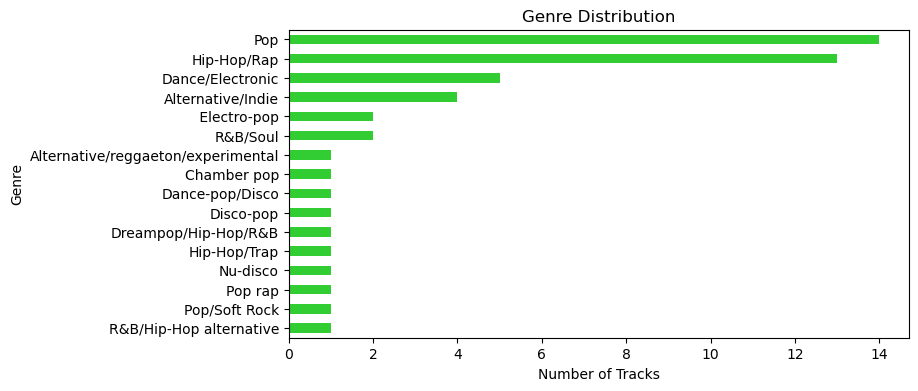

In [42]:
analyze_genres(df)
plot_genre_distribution(df)

#### Insights
- Dominant genres: Pop **28%** (14 tracks) and Hip-Hop/Rap **20%** (10 tracks) together account for nearly half of the most streamed songs.
- Dataset includes 16 distinct genres, 10 of which are represented by only one song.

### 3.6. Correlation Overview

In [43]:
def find_correlations(df, label, lower_bound, upper_bound):
    """
    Extract correlation values between numeric features in a specific range.

    Args:
        df (pd.DataFrame): Input DataFrame
        label: Label for the type of correlation
        lower_bound: Lower threshold
        upper_bound: Upper threshold

    Returns:
        pd.DataFrame: Filtered correlation matrix
    """
    numeric_df = df.select_dtypes(include="number")
    corr_matrix = numeric_df.corr()

    # Mask upper triangle to avoid duplicates
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    corr_matrix = corr_matrix.mask(mask)

    # Filter based on bounds
    filtered = corr_matrix[(corr_matrix > lower_bound) & (corr_matrix < upper_bound)]
    filtered = filtered.dropna(how="all").dropna(how="all", axis=1)

    # Replace NaNs with dash for display
    filtered = filtered.fillna("-")
    
    print(f"{label} features (correlation between {lower_bound} and {upper_bound}):") 


    return filtered

#### 3.6.1. Strongly Positive Corellation

In [44]:
find_correlations(df, "Strongly positive", 0.7, 1.0)

Strongly positive features (correlation between 0.7 and 1.0):


,energy
loudness,0.79164


#### 3.6.2. Strongly Negative Corellation

In [45]:
find_correlations(df, "Strongly negative", -1.0, -0.6)

Strongly negative features (correlation between -1.0 and -0.6):


,energy
acousticness,-0.682479


#### 3.6.3. Weak to no correlation

In [46]:
find_correlations(df, "Weak to no correlation", -0.1, 0.1)

Weak to no correlation features (correlation between -0.1 and 0.1):


,energy,danceability,loudness,acousticness,speechiness,instrumentalness,liveness,valence
speechiness,0.074267,-,-0.021693,-,-,-,-,-
instrumentalness,-,-0.017706,-,-,0.028948,-,-,-
liveness,0.069487,-0.006648,-0.069939,-,-,-0.087034,-,-
valence,-,-,-,-,0.053867,-,-0.033366,-
tempo,0.075191,-,-,-,-,0.018853,0.025457,0.045089
duration_ms,0.081971,-0.033763,0.06413,-0.010988,-,-,-0.090188,-0.039794


#### Insights
- **Energy ↔ Loudness:** With a correlation of 0.79, these two are closely linked—meaning louder tracks tend to be more energetic.
- **Energy ↔ Acousticness:** Correlation of -0.68 suggests that more acoustic tracks tend to be less energetic.


## 4. Statistical Comparison

This section examines the feature **(danceability, loudness, acousticness)** scores across top 4 music genres by:
- Comparing their mean feature values
- Visualizing score distributions

The goal is to determine if these features varies meaningfully between: Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie.

In [47]:
# Define genre selection
selected_genres = ["Pop", "Hip-Hop/Rap", "Dance/Electronic", "Alternative/Indie"]

### 4.1. Danceability between genres

#### 4.1.1 Danceability Means Comparison

In [48]:
# Average danceability scores for selected genres
genre_danceability = (
    df.groupby("genre", observed=False)["danceability"]
    .mean()
    .loc[selected_genres]
    .sort_values(ascending=False)
)

print("Danceability scores comparison between selected genres:")
display(genre_danceability.to_frame())

Danceability scores comparison between selected genres:


,danceability
genre,
Hip-Hop/Rap,0.765538
Dance/Electronic,0.755000
Pop,0.677571
Alternative/Indie,0.661750


#### 4.1.2. Danceability Score Distribution Plot

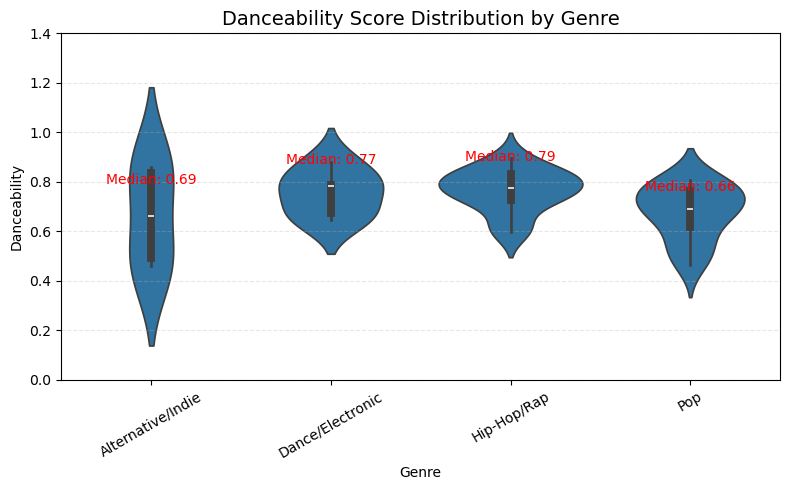

In [55]:
# Violin plot of danceability distributions by genre
filtered_df = df[df["genre"].isin(selected_genres)].copy()
filtered_df["genre"] = filtered_df["genre"].cat.remove_unused_categories()

genre_medians = filtered_df.groupby("genre", observed=False)["danceability"].median()

plt.figure(figsize=(8, 5))
sns.violinplot(data=filtered_df, x="genre", y="danceability", inner="box")

# Annotate medians
for i, genre in enumerate(selected_genres):
    median = genre_medians[genre]
    plt.text(i, median + 0.1, f"Median: {median:.2f}", ha="center", color="red")
plt.ylim(0, 1.4)

# Plot
plt.title("Danceability Score Distribution by Genre", fontsize=14)
plt.ylabel("Danceability")
plt.xlabel("Genre")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

####  Insights
- Dance/Electronic leads with the highest median danceability at 0.79
- Dance/Electronic and Hip-Hop/Rap genres are less spread, meaning their tracks consistently aim for higher danceability.
- Alternative/Indie and Pop have wider distributions, displaying more variation across tracks — from danceable hits to mellow ballads.

### 4.2. Loudness between genres

#### 4.2.1. Loudness Means Comparison

In [ ]:
# Average loudness scores for selected genres
genre_loudness = (
    df.groupby("genre", )["loudness"]
    .mean()
    .loc[selected_genres]
    .sort_values()
)

print("Loudness scores comparison between selected genres:")
display(genre_loudness.to_frame())

#### 4.2.2. Loudnes Score Distribution

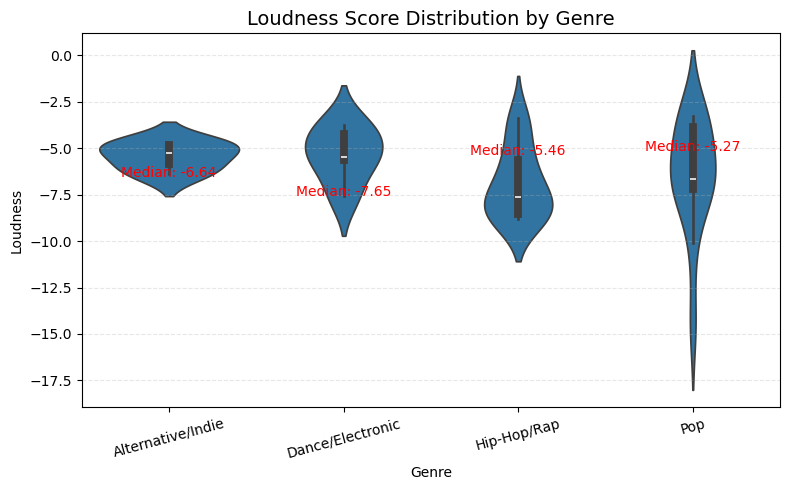

In [56]:
# Violin plot of loudness distributions by genre
filtered_df = df[df["genre"].isin(selected_genres)].copy()
filtered_df["genre"] = filtered_df["genre"].cat.remove_unused_categories()

genre_medians = filtered_df.groupby("genre", observed=False)["loudness"].median()

plt.figure(figsize=(8, 5))
sns.violinplot(data=filtered_df, x="genre", y="loudness", inner="box")

# Annotate medians
for i, genre in enumerate(selected_genres):
    median = genre_medians[genre]
    plt.text(i, median + 0.1, f"Median: {median:.2f}", ha="center", color="red")

# Plot
plt.title("Loudness Score Distribution by Genre", fontsize=14)
plt.ylabel("Loudness")
plt.xlabel("Genre")
plt.xticks(rotation=15)
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

####  Insights
- Pop is the loudest genre overall by its median loudness of –5.27 dB
- Alternative/Indie presents a moderately dispersed distribution, generally lower loudness levels.
- Hip-Hop/Rap demonstrates the broadest loudness range.
- Dance/Electronic and Pop genres exhibit relatively tight loudness distributions, indicating consistency in audio across their respective tracks.

### 4.3 Acousticness between genres

#### 4.3.1. Acousticness Means Comparison

In [ ]:
# Average acousticness scores for selected genres
genre_acousticness = (
    df.groupby("genre", observed=False)["acousticness"]
    .mean()
    .loc[selected_genres]
    .sort_values(ascending=False)
)

print("Acousticness scores comparison between selected genres:")
display(genre_acousticness.to_frame())

#### 4.3.2. Acousticness Score Distribution

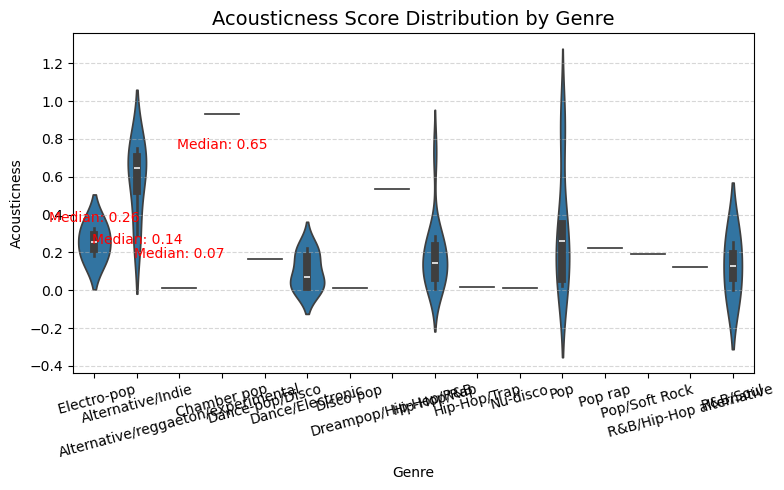

In [54]:
# Violin plot of acousticness distributions by genre
filtered_df["genre"] = filtered_df["genre"].cat.remove_unused_categories()
genre_medians = filtered_df.groupby("genre", observed=True)["acousticness"].median()

plt.figure(figsize=(8, 5))
sns.violinplot(data=filtered_df, x="genre", y="acousticness", inner="box")

# Annotate medians
for i, genre in enumerate(selected_genres):
    median = genre_medians[genre]
    plt.text(i, median + 0.1, f"Median: {median:.2f}", ha="center", color="red")

# Plot
plt.title("Acousticness Score Distribution by Genre", fontsize=14)
plt.ylabel("Acousticness")
plt.xlabel("Genre")
plt.xticks(rotation=15)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

#### Insights
- Pop exhibits the highest median acousticness (0.65)
- Pop and Alternative/Indie show bigger variability in acousticness.
- Dance/Electronic has the tightest distribution, reinforcing its low acousticness across tracks.

## Exploratory Data Analysis Highlights

- **Top Artists:** Billie Eilish, Dua Lipa, and Travis Scott are the most featured artists, each with three songs in the top 50. 
- **Top Album:** Dua Lipa's album, "Future Nostalgia," is the most prominent album with three tracks.
- **Genre Dominance:** Pop and Hip-Hop/Rap are the most dominant genres, making up nearly half of the top tracks.
- The dataset contains 16 unique genres, with 10 of them appearing only once.

Key Audio Features:

- Danceability: **A majority of the top tracks (64%) are highly danceable.**
- Loudness: Top tracks are generally loud.
- Acousticness: **Alternative/Indie tracks have the highest acousticness**, while Dance/Electronic tracks have the lowest.

Feature Correlations:

- There is a strong positive correlation between a track's energy and its loudness.
- There is a strong negative correlation between energy and acousticness, meaning more acoustic songs tend to be less energetic.

The song lengths in the top 50 vary, with:
- Longest: "Sicko Mode" by Travis Scott (5:12)
- Shortest: "Mood" by 24kGoldn (2:20).

Defined Hit Track:

- **High Energy & Danceability**
- **Low Acousticness & Speechiness**
- **Optimal Loudness**
- **Minimal Instrumentalness**

### Recommendations

For Marketing & Promotional Strategies:

- **Leverage Top Performers:** Feature the top artists (Billie Eilish, Dua Lipa, Travis Scott) and the top album ("Future Nostalgia") in marketing campaigns to capitalize on their popularity.
- **Create Themed Campaigns:** Develop marketing initiatives based on audio features like "high-danceability" playlists or "high-energy" workout mixes to target specific listener preferences.
- **Target Genre-Specific Audiences:** Use the genre insights to tailor marketing efforts. For example, promote high-danceability Hip-Hop/Rap tracks to audiences interested in dance and parties.

For Data Analysis & Future Research:

- **Explore Sub-Genres:** Investigate the dominant "Pop" category further to identify which sub-genres are most successful.
- **Analyze Audio Feature Drivers:** Conduct a deeper analysis to understand the specific musical elements (like BPM, rhythm, and instrumentation) that contribute to high or low scores in danceability and acousticness.
- **Expand the Dataset:** To validate these trends, analyze a larger and more diverse dataset of popular music from different years or regions.